In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%run data_frames.ipynb


                  montos     inp        pib       fbc      roe      roa
fecha                                                                  
2000-04-01  7.911855e+08  191.94  100329.48  30688.07  0.01105 -0.01275
2000-07-01  2.243034e+09  198.11  101038.64  29361.68  0.01760 -0.01170
2000-10-01  7.573976e+08  204.14  109422.18  27006.68  0.02415 -0.01065
2001-01-01  6.559477e+08  209.08  101475.53  31964.81  0.03190 -0.00120
2001-04-01  1.236151e+08  215.71  104079.62  33305.56  0.03230 -0.00045


C:\Users\jimen\AppData\Local\Temp\ipykernel_29104\1236089611.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha'] = pd.to_datetime(df['ano'].astype(str) + 'Q' + df['trimestre'].astype(str))


Historicos

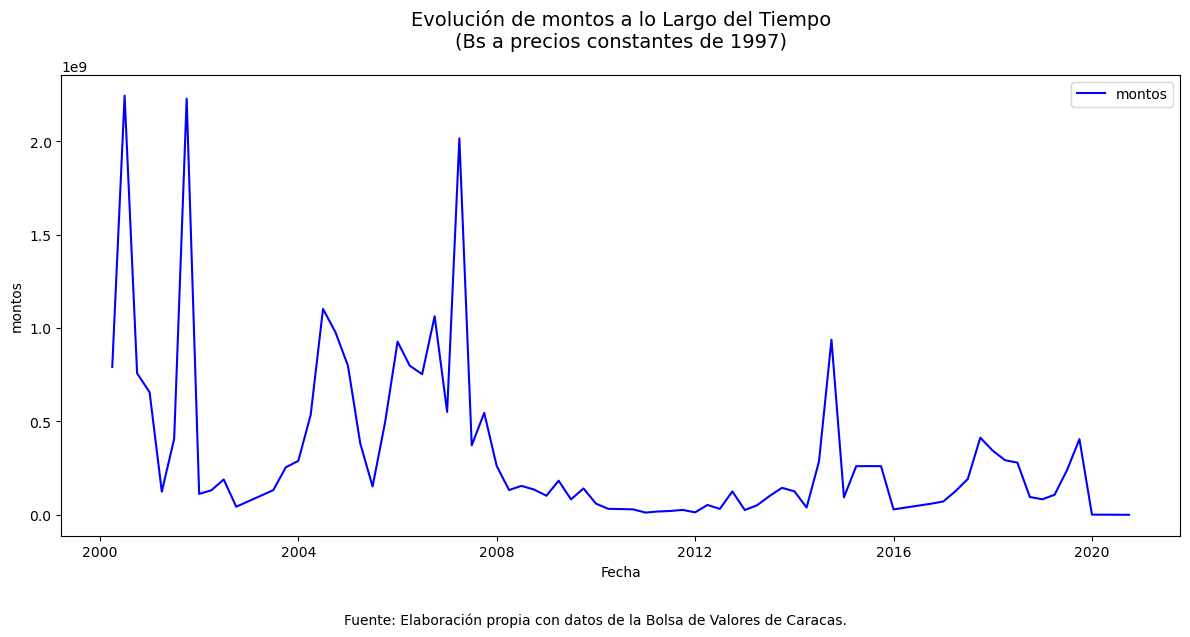

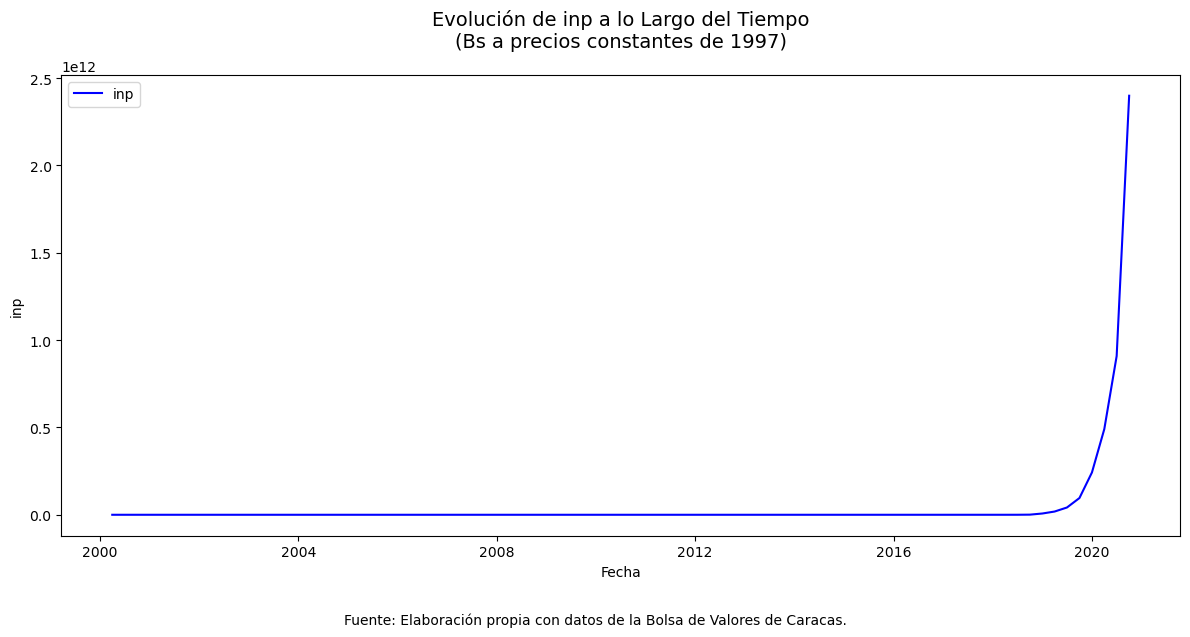

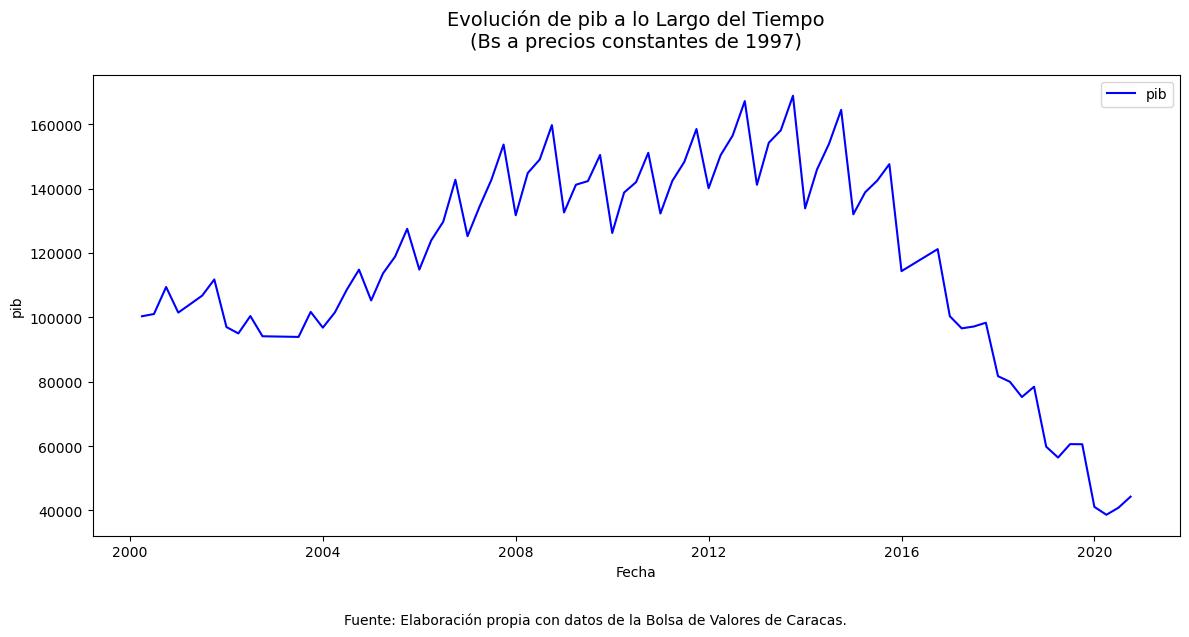

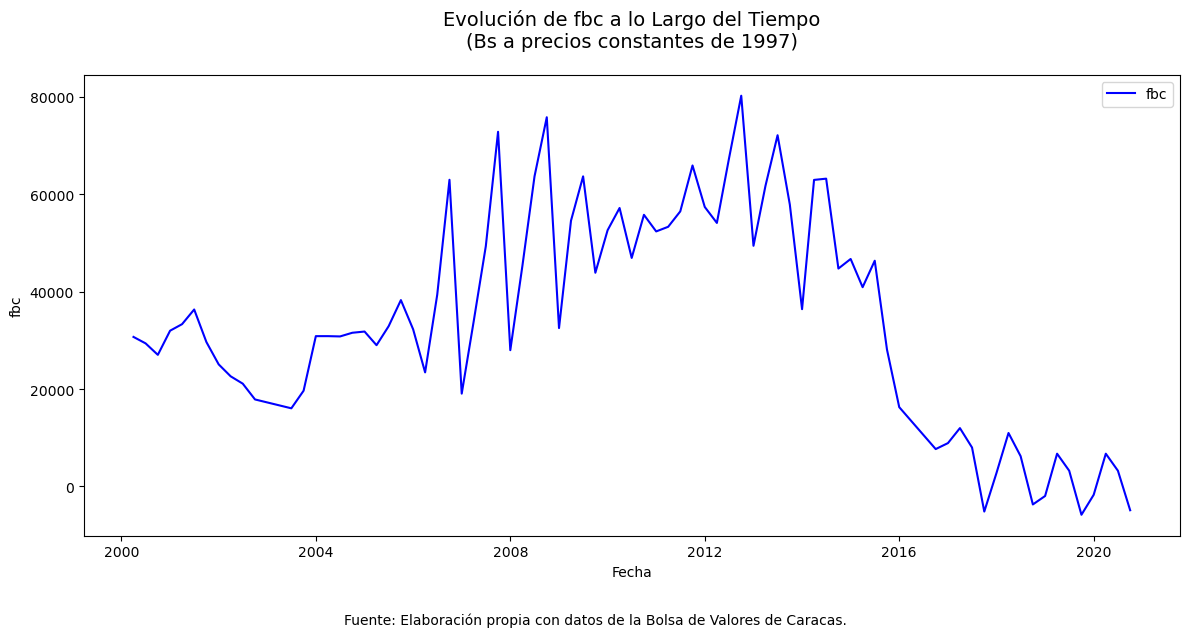

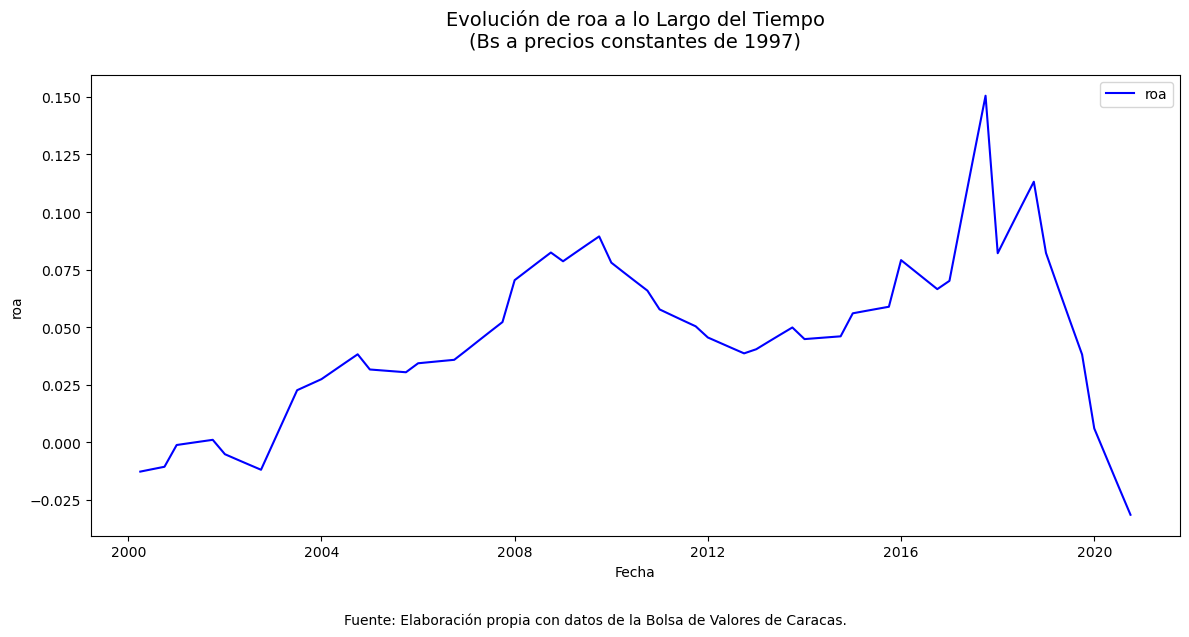

In [9]:
fuente = "Fuente: Elaboración propia con datos de la Bolsa de Valores de Caracas."
moneda = "Bs a precios constantes de 1997"
variables_excluir = ['roe', 'rae']
# Filtrar las columnas del DataFrame
variables = [var for var in df.columns if var not in variables_excluir]
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[var], label=var, color='blue')
    plt.title(f'Evolución de {var} a lo Largo del Tiempo\n({moneda})', pad=20, fontsize=14)
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.figtext(0.5, -0.05, fuente, ha="center", fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

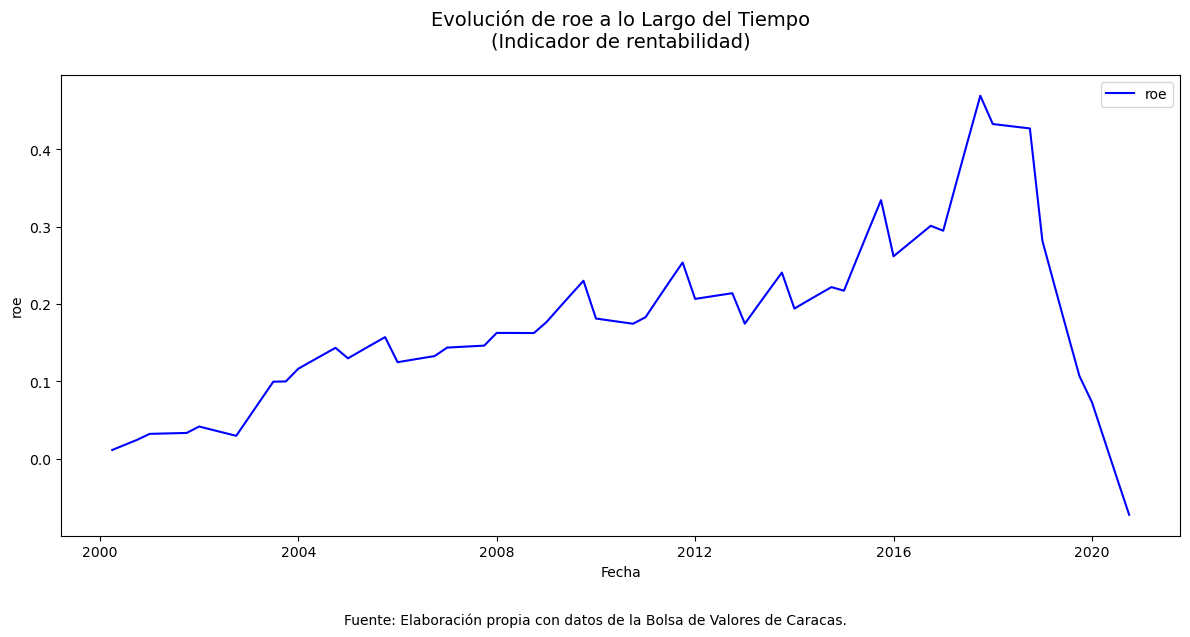

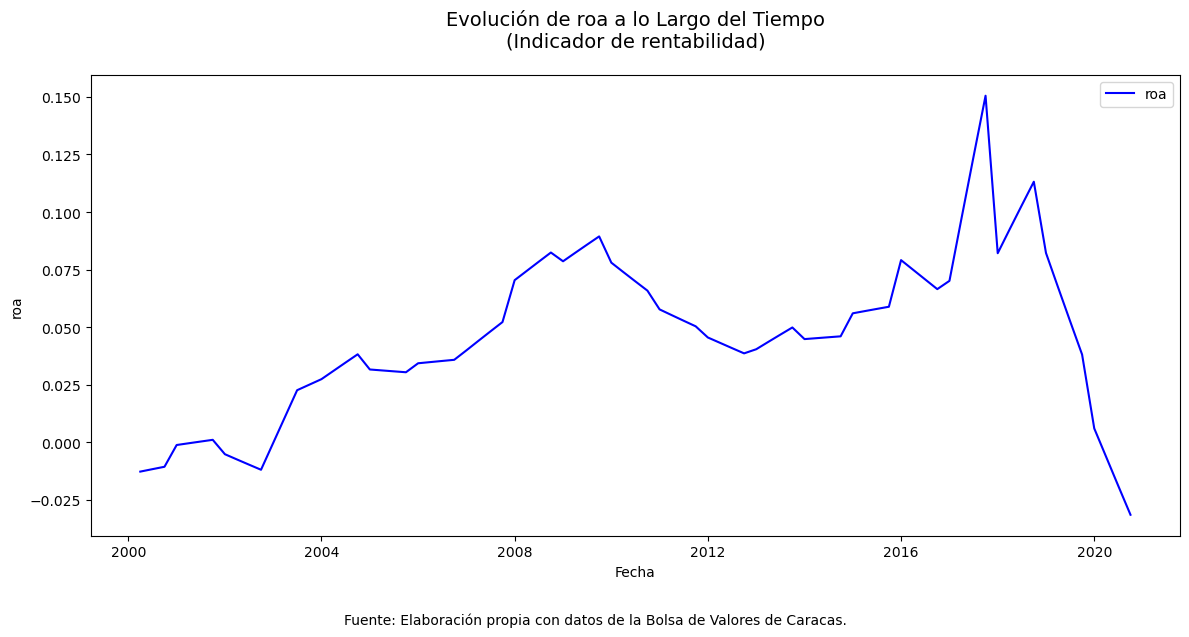

In [10]:

fuente = "Fuente: Elaboración propia con datos de la Bolsa de Valores de Caracas."
moneda = "Indicador de rentabilidad"
variables_excluir = ['montos', 'pib', 'fbc', 'inp']
# Filtrar las columnas del DataFrame
variables = [var for var in df.columns if var not in variables_excluir]
for var in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[var], label=var, color='blue')
    plt.title(f'Evolución de {var} a lo Largo del Tiempo\n({moneda})', pad=20, fontsize=14)
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.figtext(0.5, -0.05, fuente, ha="center", fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

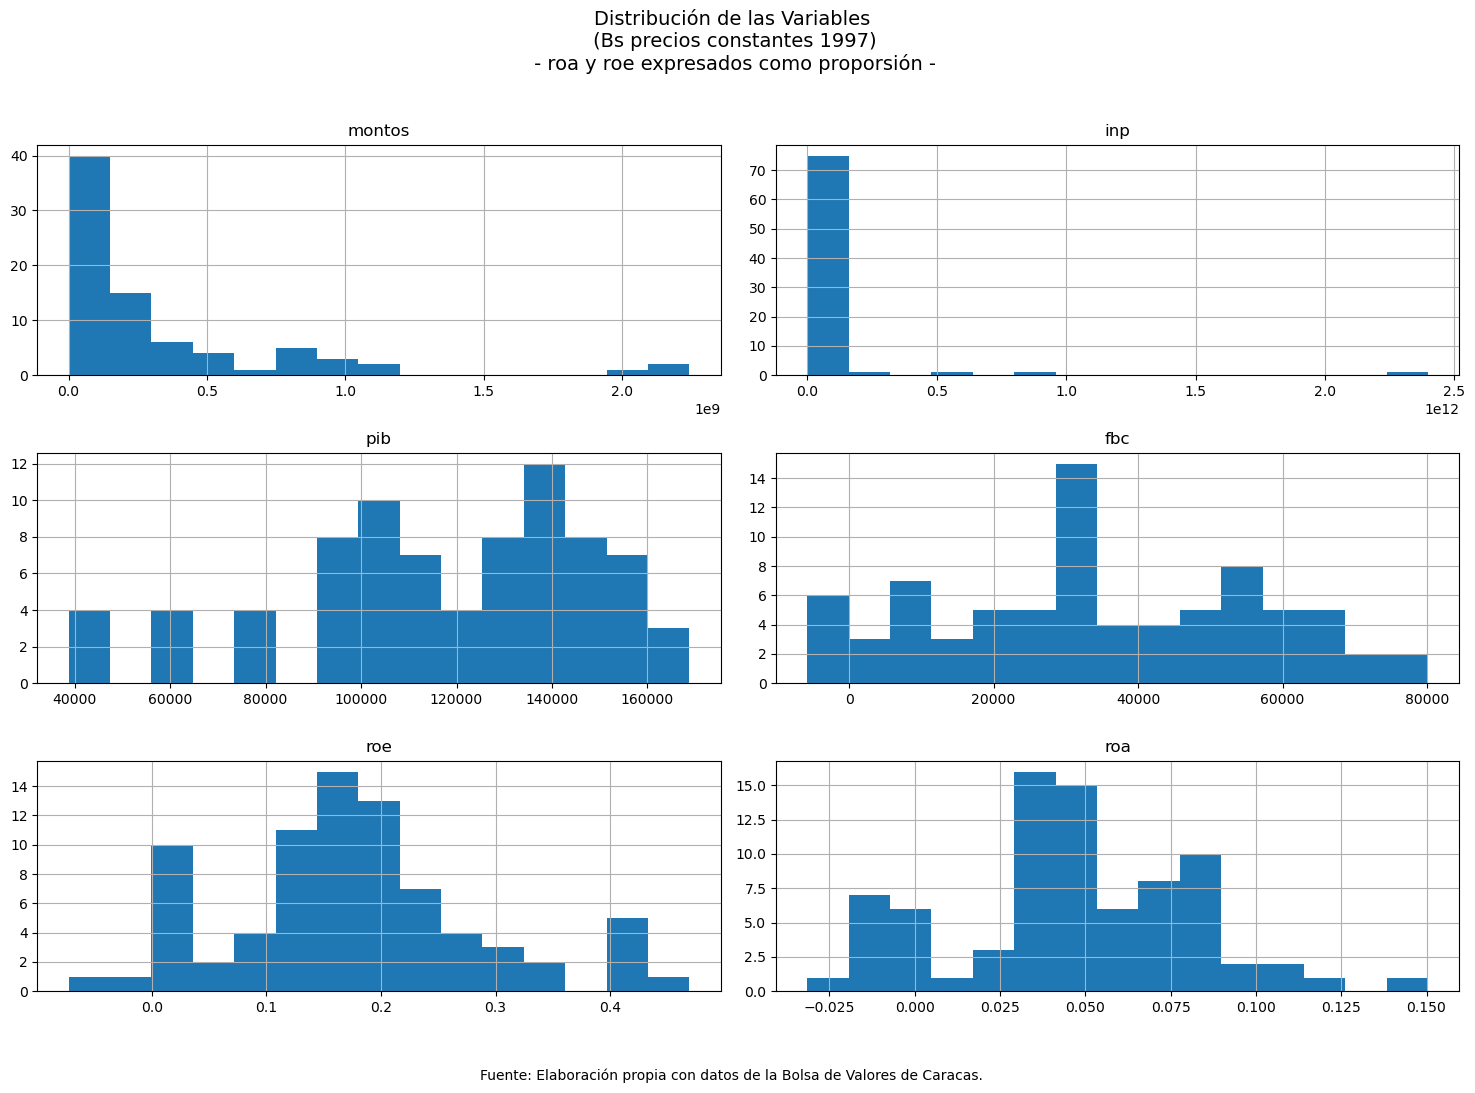

In [12]:
fuente = "Fuente: Elaboración propia con datos de la Bolsa de Valores de Caracas."
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de las Variables\n (Bs precios constantes 1997)\n - roa y roe expresados como proporsión -', fontsize=14, y=1.02)
plt.figtext(0.5, -0.05, fuente, ha="center", fontsize=10)
plt.tight_layout() # Ajustar el diseño para que no se solapen los elementos
plt.show()

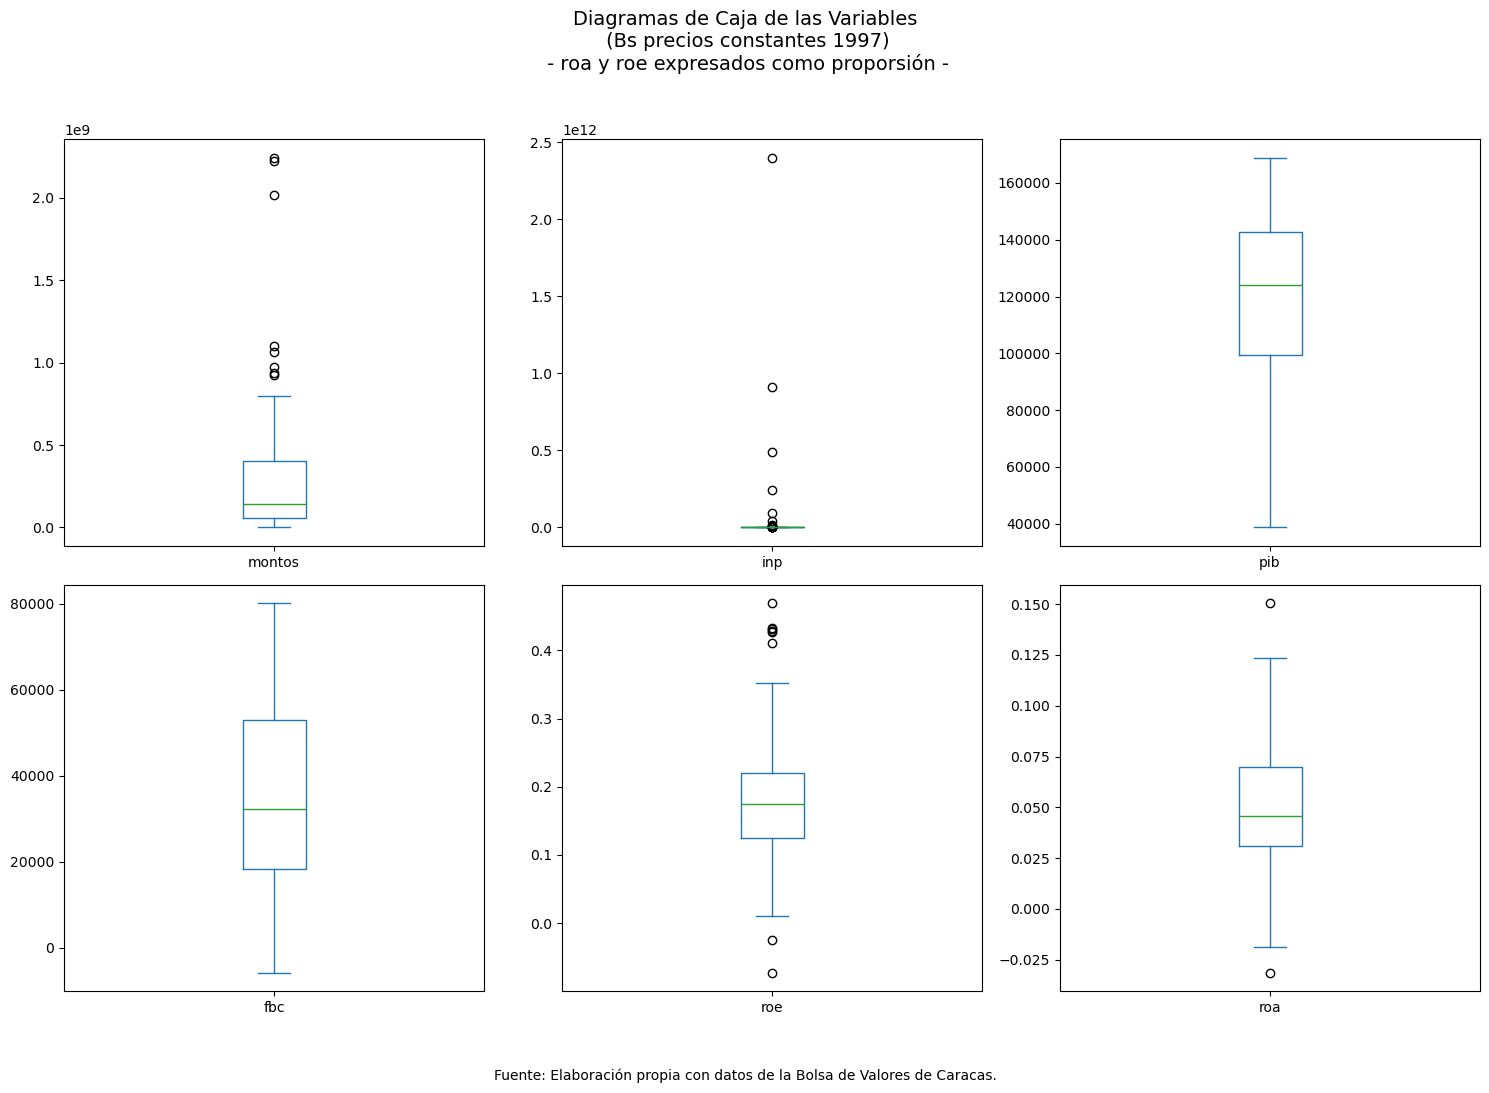

In [13]:
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Diagramas de Caja de las Variables\n (Bs precios constantes 1997)\n - roa y roe expresados como proporsión -', fontsize=14, y=1.02)
plt.figtext(0.5, -0.05, fuente, ha="center", fontsize=10)
plt.tight_layout() # Ajustar el diseño para que no se solapen los elementos
plt.show()

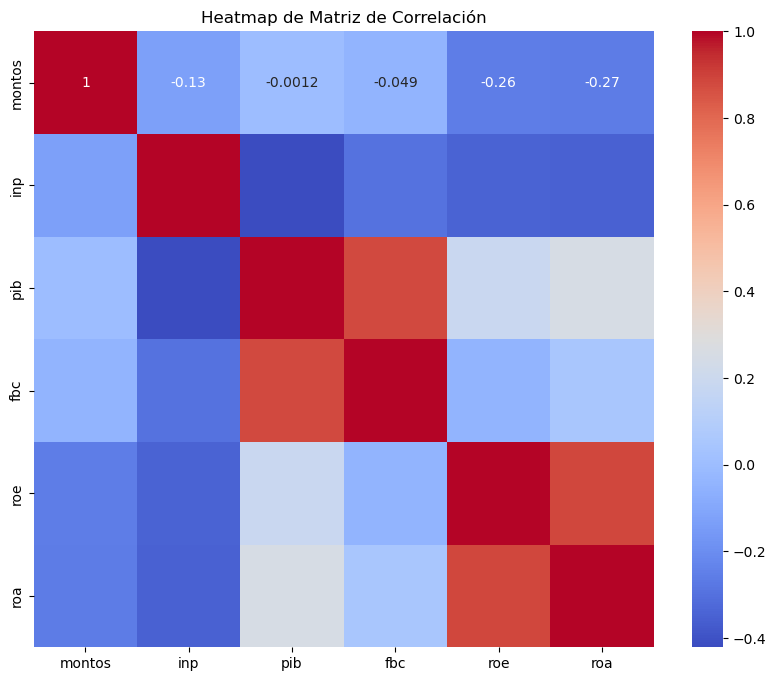

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de Correlación')
plt.show()

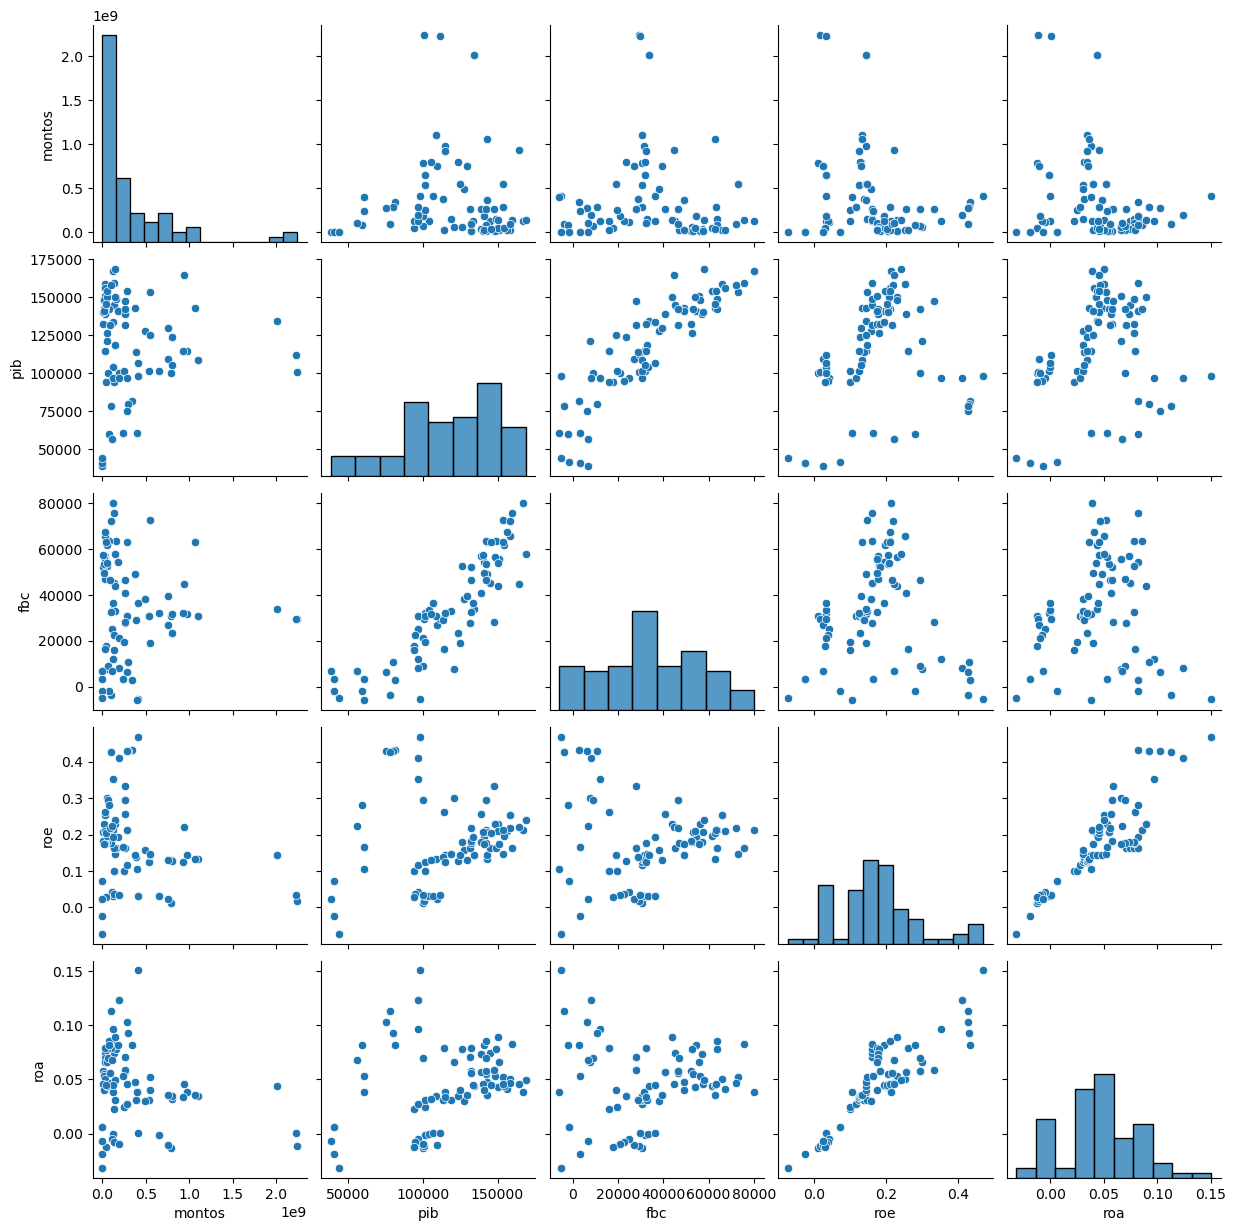

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df[['montos','pib', 'fbc', 'roe', 'roa']])
plt.show()

<Figure size 1000x500 with 0 Axes>

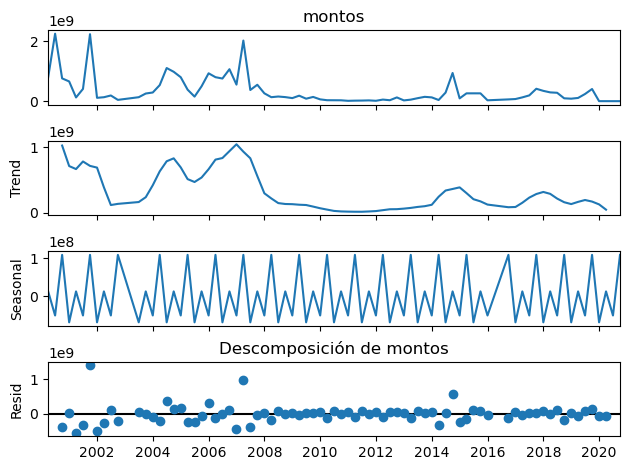

<Figure size 1000x500 with 0 Axes>

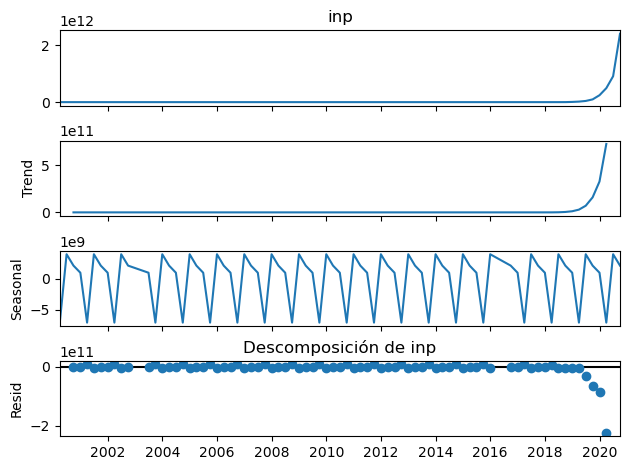

<Figure size 1000x500 with 0 Axes>

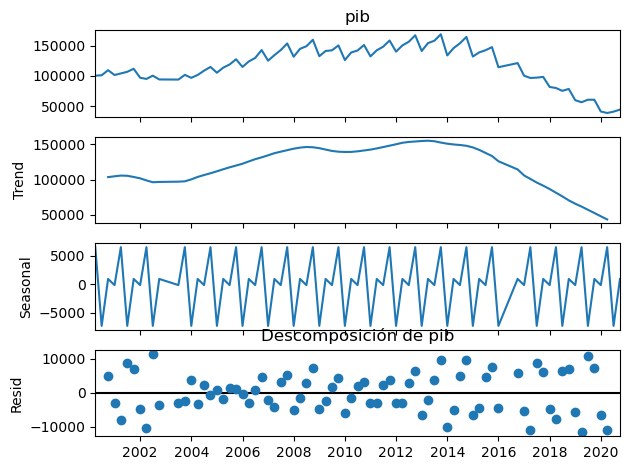

<Figure size 1000x500 with 0 Axes>

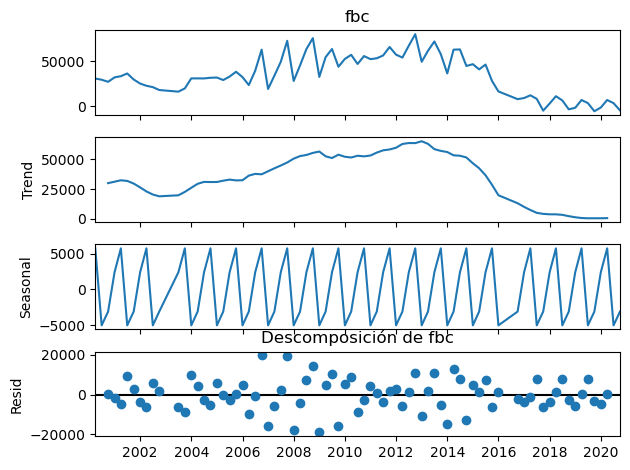

<Figure size 1000x500 with 0 Axes>

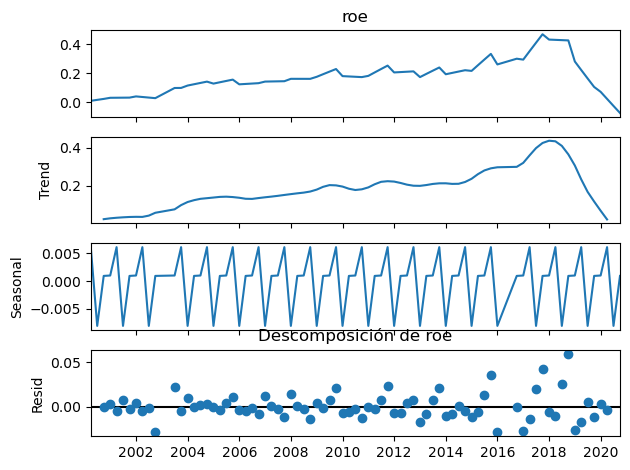

<Figure size 1000x500 with 0 Axes>

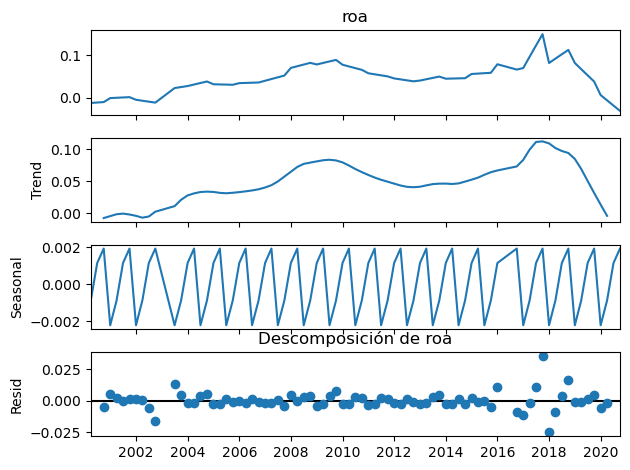

In [19]:
for var in variables:
    # Nos aseguramos de que la serie no tenga valores NaN
    series = df[var].dropna()
    # Si la serie tiene una longitud suficiente para descomposición
    if len(series) > 2 * 4:  # '4' es el período para datos trimestrales
        decomposition = sm.tsa.seasonal_decompose(series, model='additive', period=4)
        plt.figure(figsize=(10, 5))
        decomposition.plot()
        plt.title(f'Descomposición de {var}')
        plt.show()